In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
data = pd.read_csv(r'C:\Users\79169\Desktop\пет проекты и портфолио\energydata_complete.csv')
data
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


date time year-month-day hour:minute:second
 
lights, energy use of light fixtures in the house in Wh
 
T1, Temperature in kitchen area, in Celsius

 RH_1, Humidity in kitchen area, in %
 
 RH_2, Humidity in living room area, in %
 
T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Соберем данные по кухне

In [27]:
data_kitchen = data[['date','Appliances','T1','RH_1','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']] 
data_kitchen = data_kitchen.copy()
data_kitchen.head()

,date,Appliances,T1,RH_1,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,47.596667,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,46.693333,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,46.300000,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,46.066667,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,46.333333,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
data_kitchen['date'] = pd.to_datetime(data_kitchen['date'])

In [29]:
data_kitchen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T_out        19735 non-null  float64       
 5   Press_mm_hg  19735 non-null  float64       
 6   RH_out       19735 non-null  float64       
 7   Windspeed    19735 non-null  float64       
 8   Visibility   19735 non-null  float64       
 9   Tdewpoint    19735 non-null  float64       
 10  rv1          19735 non-null  float64       
 11  rv2          19735 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 1.8 MB


## Произведем группировку данных по дням и найдем средние значения по каждому дню

In [30]:
data_kitchen.set_index('date', inplace=True)

In [31]:
daily_data = data_kitchen.resample('D').mean()
daily_data

,Appliances,T1,RH_1,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,
2016-01-11,136.666667,20.808571,46.906210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,20.092326,45.142014,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,19.197824,42.867772,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,20.372078,42.435191,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,22.280949,39.099294,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,83.055556,24.445046,47.025307,12.570486,755.849653,84.225694,4.208333,46.017361,9.851736,24.611743,24.611743
2016-05-24,96.180556,24.299340,42.112535,11.568750,759.007292,76.680556,4.114583,33.975694,7.469097,25.494683,25.494683
2016-05-25,83.888889,23.899353,38.929815,11.563542,756.887500,74.774306,1.350694,30.739583,6.819097,27.630188,27.630188


<Axes: >

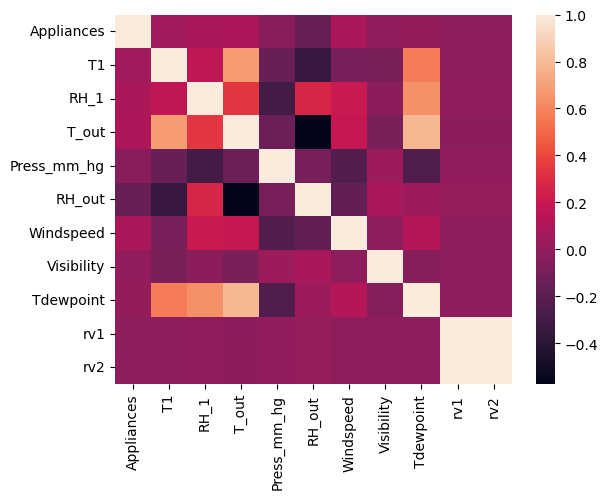

In [32]:
corr = data_kitchen.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Как видно из графика случайные величины rv1 и rv2 не оказывают влияния на остальные данные и их можно убрать

In [33]:
data_kitchen = data_kitchen.drop(['rv1','rv2'], axis=1)

<Axes: >

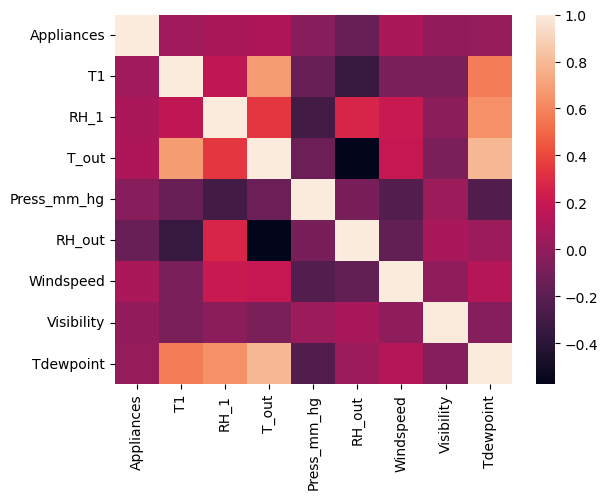

In [34]:
corr = data_kitchen.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Мы можем видеть, что имеется высокая корреляция точки росы (Tdewpoint) с температурами (T1, T_out) а также с влажностью, поэтому уберем ее


In [37]:
data_kitchen = data_kitchen.drop(['Tdewpoint'], axis=1)


<Axes: >

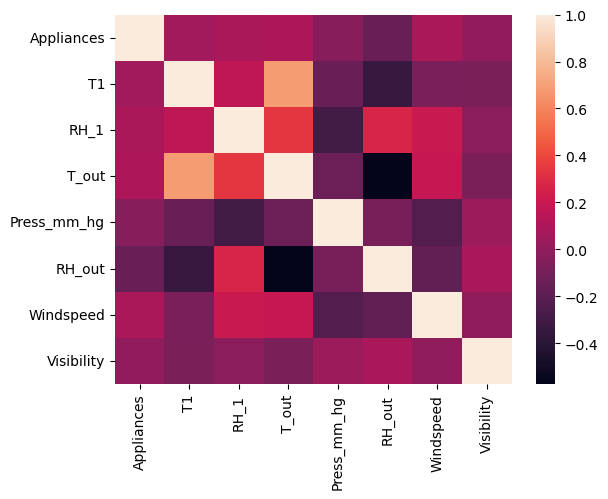

In [38]:
corr = data_kitchen.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)